In [27]:
# 1. standard libarys
import string as st
import sys

# 2.  third party libarys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import interp1d
from gurobipy import *


# 3. local libarys
%run blatt4_data.ipynb import size, weight, x1, y1, x3, y3 # provides (x1,y1) (x3,y3) (weight,size) as np arrays

### Team: 

### Erik Autenrieth (eauten2s)
### Minh Tuong (mtruon2s)


## Aufgabe 1. Ausgleichsrechnung mit:  $$  ||\cdot||_{1} - Norm $$ 


### - Funktionen

In [28]:
# Beispiel für function Parameter: x^2 + x + c -> ["c", "x", x**2]
# Beispiel für bounds Parameter: a >= 0, b <= 0, c ist Frei -> ["a >= 0", "b <= 0", "free"]
# coding style PEP8 [tab or 4spaces], 2bl for top level fun, 1bl logic level

def create_lp(function:[str]=None, bounds:[str]=None, x:[float]=None, y:[float]=None, 
              typ:str="minimize", filename:str=None):
    
    n, m = len(x), len(function)
    function[0], zu, zv = '','',''
    s = typ + '\n\t' + '#' + '\n' +'subject to' + '\n' 
    fun = list(function)
    
    for i in range(0,n,1):
        zu += 'u' + str(i) + ' + '   # init all u values
        zv += 'v' + str(i) + ' + '   # init all v values 
        tmp = "\t"
        for j in range(0,m,1):
            value = ""
            if (fun[j] != ""):
                value = str(eval(fun[j].replace("x", str(x[i]))))
            tmp += value + " " + st.ascii_lowercase[j].replace("e", "") + " + "
        tmp += 'u{0} - v{1} = {2} \n'.format(i, i, y[i])
        s+=tmp
    
    s = s.replace('#',zu+'\n\t'+zv[:-2]) # init s
    s += "\nbounds\n\t"                  # init s
    
    for i in range(len(bounds)):         # init bounds 
        s += st.ascii_lowercase[i] +" " + bounds[i] + "\n\t" 
    s  += "\nend"
    print(s)
    return to_file(s,filename)            # return a file.lp with all functions


def to_file(s:str=None,filename:str=None)->str:
    if(not isinstance(s,str)): sys.exit('No input data')
    try:
        f = open(filename,"w+")
        f.write(s)
        return filename
    except Error as e: print(" Buit-in exception",e)
    except: print("error by open or reading the file", sys.exc_info())
    finally: f.close()   

### - Daten einlesen und LP erstellen

In [29]:
print('Aufgabe a) LP')
lp_a = create_lp(function=['c','x'], bounds=['free', 'free'], x=size, y=weight.astype(float), filename="pl81.lp")

Aufgabe a) LP
minimize
	u0 + u1 + u2 + u3 + u4 + u5 + u6 + u7 + u8 + u9 + u10 + u11 + u12 + u13 + u14 + u15 + 
	v0 + v1 + v2 + v3 + v4 + v5 + v6 + v7 + v8 + v9 + v10 + v11 + v12 + v13 + v14 + v15 
subject to
	 a + 1.55 b + u0 - v0 = 51.0 
	 a + 1.57 b + u1 - v1 = 50.0 
	 a + 1.62 b + u2 - v2 = 55.0 
	 a + 1.68 b + u3 - v3 = 52.0 
	 a + 1.75 b + u4 - v4 = 60.0 
	 a + 1.76 b + u5 - v5 = 68.0 
	 a + 1.81 b + u6 - v6 = 78.0 
	 a + 1.83 b + u7 - v7 = 91.0 
	 a + 1.87 b + u8 - v8 = 84.0 
	 a + 1.89 b + u9 - v9 = 81.0 
	 a + 1.9 b + u10 - v10 = 90.0 
	 a + 1.92 b + u11 - v11 = 105.0 
	 a + 1.95 b + u12 - v12 = 95.0 
	 a + 1.96 b + u13 - v13 = 99.0 
	 a + 1.99 b + u14 - v14 = 100.0 
	 a + 2.02 b + u15 - v15 = 101.0 

bounds
	a free
	b free
	
end


In [52]:
print('Aufgabe b) LP')
lp_b = create_lp(function=["c", "x", "x**2"], bounds=["free", "free", "free"], x=x1, y=y1, filename="pl82.lp")
# lp_xy = create_lp(function=["c", "x", "x**2", "x**3", "x**4", "x**5", "x**6"], bounds=["free", "free", "free"], x=x1, y=y1, filename="noname.lp")

Aufgabe b) LP
minimize
	u0 + u1 + u2 + u3 + u4 + u5 + u6 + u7 + u8 + u9 + u10 + 
	v0 + v1 + v2 + v3 + v4 + v5 + v6 + v7 + v8 + v9 + v10 
subject to
	 a + 0.0 b + 0.0 c + u0 - v0 = 5.1 
	 a + 0.5 b + 0.25 c + u1 - v1 = 7.8 
	 a + 1.0 b + 1.0 c + u2 - v2 = 7.1 
	 a + 1.5 b + 2.25 c + u3 - v3 = 7.4 
	 a + 2.0 b + 4.0 c + u4 - v4 = 9.4 
	 a + 2.5 b + 6.25 c + u5 - v5 = 8.4 
	 a + 3.0 b + 9.0 c + u6 - v6 = 8.9 
	 a + 3.5 b + 12.25 c + u7 - v7 = 6.2 
	 a + 4.0 b + 16.0 c + u8 - v8 = 4.7 
	 a + 4.5 b + 20.25 c + u9 - v9 = 3.3 
	 a + 5.0 b + 25.0 c + u10 - v10 = 0.6 

bounds
	a free
	b free
	c free
	
end


### - Modele erstellen

In [31]:
# Aufgabe 1) a
model_a = Model(name = 'linear program a')
model_a = read(lp_a)
model_a.Params.LogToConsole = 0
model_a.optimize()
# Aufgabe 1) b
model_b = Model(name = 'linear program b')
model_b = read(lp_b)
model_b.Params.LogToConsole = 0
model_b.optimize()

Read LP format model from file pl81.lp
Reading time = 0.01 seconds
: 16 rows, 34 columns, 64 nonzeros
Read LP format model from file pl82.lp
Reading time = 0.01 seconds
: 11 rows, 25 columns, 53 nonzeros


###  (a) Daten aus Blatt5, Aufgabe2
#### Regressionsgerade $$y = ax + b$$
#### Fehlerfunktional $$E_{1}(a,b)=\sum_{i=1}^{n}|ax_{i}+b- y_{i}| $$ 

In [32]:
print('Objective Funktion Value: %f'% model_a.objVal)
print('None-zero Vars:')
for v in model_a.getVars():
    if(v.x != 0):print('%s: %g' %(v.varName,v.x))

Objective Funktion Value: 69.272727
None-zero Vars:
u0: 4.48485
u1: 1.06061
u7: 10.5455
u10: 1.06061
u11: 13.6364
u13: 2.78788
u14: 0.151515
v3: 10.2727
v4: 10.7576
v5: 3.9697
v6: 0.030303
v8: 1.30303
v9: 6.72727
v15: 2.48485
a: -141.364
b: 121.212


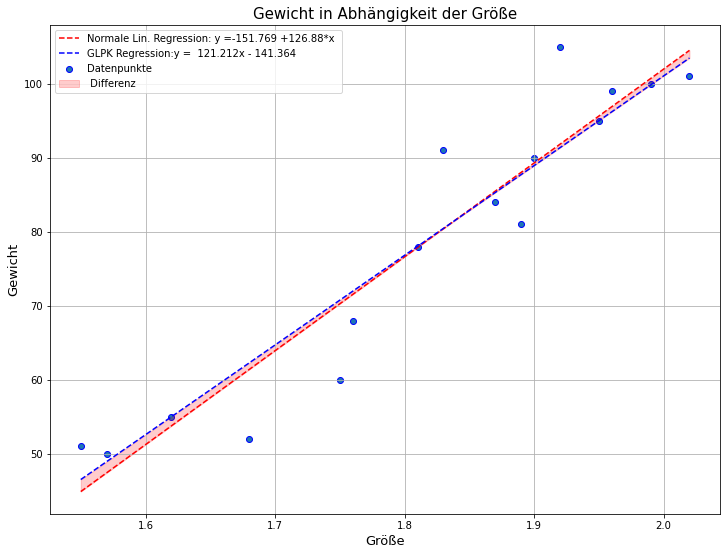

In [33]:
a,b = model_a.X[-2:]
a_n = stats.linregress(size,weight)
x_range = np.linspace(min(size), max(size))

plt.figure(figsize=(12,9))
plt.title("Gewicht in Abhängigkeit der Größe", fontsize = 15)

plt.scatter(size, weight , edgecolors='b', label = 'Datenpunkte')
plt.plot(x_range, a_n[1]+a_n[0]*x_range, 'r--', label = "Normale Lin. Regression: y ={0} +{1}*x ".format(round(a_n[1],3),round(a_n[0],2)))
plt.plot(x_range, a+b*x_range,'b--', label = "GLPK Regression:y =  121.212x - 141.364")
plt.fill_between(x_range,a+b*x_range,a_n[1]+a_n[0]*x_range ,color='r',alpha=0.2,label = ' Differenz')

plt.ylabel("Gewicht", fontsize= 13)
plt.xlabel("Größe", fontsize= 13)
plt.legend()
plt.grid()
plt.show()

###  (b) Daten aus Blatt5, Aufgabe1
#### Regressionsgerade $$y = ax^2 + bx +c $$
#### Fehlerfunktional $$E_{1}(a,b,c)=\sum_{i=1}^{n}|ax^2_{i}+bx_{i}+ c - y_{i}| $$ 

In [34]:
print('Objective Funktion Value: %f'% model_b.objVal)
print('None-zero Vars:')
for v in model_b.getVars():
    if(v.x != 0):print('%s: %g' %(v.varName,v.x))

Objective Funktion Value: 5.776000
None-zero Vars:
u1: 1.152
u4: 0.772
u6: 1.172
u9: 0.252
v2: 0.652
v3: 1.012
v7: 0.412
v8: 0.352
a: 5.1
b: 3.54
c: -0.888


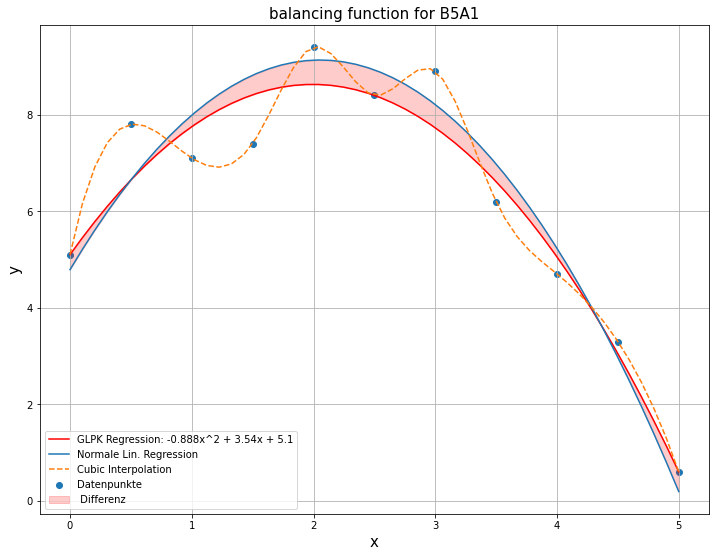

In [35]:
a,b,c = model_b.X[-3:]
x_range = np.linspace(min(x1), max(x1), endpoint=True)
f1 = lambda x: a + b*x + c*(x**2)
f2 = lambda x: -1.030024*x**2 + 4.23045*x + 4.7892
f3 = interp1d(x1, y1, kind='cubic')
plt.figure(figsize=(12,9))
plt.title("balancing function for B5A1", fontsize = 15)
plt.scatter(x1, y1, label = "Datenpunkte")
plt.plot(x_range, f1(x_range),'r', label = "GLPK Regression: -0.888x^2 + 3.54x + 5.1")
plt.plot(x_range,f2(x_range) , label = "Normale Lin. Regression ")
plt.plot(x_range,f3(x_range), '--', label='Cubic Interpolation' )
plt.fill_between(x_range, f1(x_range),f2(x_range),f3(x_range) ,color='r',alpha=0.2,label = ' Differenz')
plt.ylabel("y", fontsize= 15)
plt.xlabel("x", fontsize= 15)         
plt.legend(loc='best')
plt.grid()
plt.show()

## Aufgabe 2 (Trennende Hyperebene)

### (a)

### Daten einlesen

In [36]:
x = np.array([0.6, 1, 1.4, 1.5, 2.5, 2.6, 2.7, 2.9, 3.0, 3.5, 3.6, 4.1, 4.4,5.2, 5.5, 5.6,5.8, 6.0, 7.2, 7.5, 7.6, 8.6, 9.6, 9.9, 10.6, 11.1])
y = np.array([2.5, 0.9, -2.9, 1.4, 2.5, -2.5, -3.9, 3.5, 1.1, -1.5, -2.4, -3.6, 2.3, -2.4, -1.4, 1.6, -3.2, 3.6, -1.2, 2.4, -1.9, 3.4, 0.6, -1.3, 2.5, 1.7])
k = np.array([1,1,2,1,1,2,2,1,1,2,2,2,1,2,2,1,2,1,2,1,2,1,2,2,1,2])


klassen = pd.DataFrame({'xi':x, 'yi':y, 'Klasse': k})
klassen.sort_values(by='Klasse', inplace=True)
klassen.reset_index(drop=True, inplace=True)

klasse_1 = klassen[klassen['Klasse']==1]
klasse_2 = klassen[klassen['Klasse']==2]

klasse_1 = klasse_1.sort_values(by=['xi']).reset_index(drop=True)# .set_index('Klasse')
klasse_2 = klasse_2.sort_values(by=['xi']).reset_index(drop=True)
klassen    # # .set_index('Klasse')

,xi,yi,Klasse
0,0.6,2.5,1
1,8.6,3.4,1
2,7.5,2.4,1
3,6.0,3.6,1
4,5.6,1.6,1
5,10.6,2.5,1
6,3.0,1.1,1
7,4.4,2.3,1
8,1.0,0.9,1
9,2.5,2.5,1


### LP erzeugen

In [37]:
def lp_hyperebene(functions:[str]=['c','x'],a_x:[float]=None, a_y:[float]=None,b_x:[float]=None, 
                  b_y:[float]=None, delta=True, filename:str=None):
    
    functions[0] = ""
    n, m, l = len(functions), len(a_x), len(b_x)   # assume all input-array have the same length
    alpha = list(st.ascii_lowercase)[:n]
    s = 'maximize\n\t' + 'delta' + '\nsubject to\n'
    acl, bcl = '', ''

    for i in range(0,len(a_x)): acl += '\ta + {0} b + delta <= {1}\n'.format(a_x[i], a_y[i])
    for j in range(0,l): bcl += '\ta + {0} b - delta >= {1}\n'.format(b_x[j], b_y[j])
    s += acl  + '\n'
    s += bcl + '\n'
    
    s += 'bounds\n'
    for i in alpha: s+= '\t' + i + ' free\n'
    s += '\tdelta >= 0'
    s += '\nend'
    print(s)
    return to_file(s,filename) 

In [38]:
x_k1 = np.array(klasse_1['xi'].values)
y_k1 = np.array(klasse_1['yi'].values)
x_k2 = np.array(klasse_2['xi'].values)
y_k2 = np.array(klasse_2['yi'].values)

deltalp = lp_hyperebene(functions=['c', 'x'],a_x=x_k1, a_y=y_k1, b_x=x_k2, b_y=y_k2, filename='delta.lp')

maximize
	delta
subject to
	a + 0.6 b + delta <= 2.5
	a + 1.0 b + delta <= 0.9
	a + 1.5 b + delta <= 1.4
	a + 2.5 b + delta <= 2.5
	a + 2.9 b + delta <= 3.5
	a + 3.0 b + delta <= 1.1
	a + 4.4 b + delta <= 2.3
	a + 5.6 b + delta <= 1.6
	a + 6.0 b + delta <= 3.6
	a + 7.5 b + delta <= 2.4
	a + 8.6 b + delta <= 3.4
	a + 10.6 b + delta <= 2.5

	a + 1.4 b - delta >= -2.9
	a + 2.6 b - delta >= -2.5
	a + 2.7 b - delta >= -3.9
	a + 3.5 b - delta >= -1.5
	a + 3.6 b - delta >= -2.4
	a + 4.1 b - delta >= -3.6
	a + 5.2 b - delta >= -2.4
	a + 5.5 b - delta >= -1.4
	a + 5.8 b - delta >= -3.2
	a + 7.2 b - delta >= -1.2
	a + 7.6 b - delta >= -1.9
	a + 9.6 b - delta >= 0.6
	a + 9.9 b - delta >= -1.3
	a + 11.1 b - delta >= 1.7

bounds
	a free
	b free
	delta >= 0
end


In [39]:
model_del = Model(name = 'lp delta')
model_del = read(deltalp)
model_del.Params.LogToConsole = 0
model_del.optimize()

Read LP format model from file delta.lp
Reading time = 0.00 seconds
: 26 rows, 3 columns, 78 nonzeros


In [40]:
for v in model_del.getVars():
    if(v.x != 0):print('%s: %g' %(v.varName,v.x))

delta: 0.505263
a: -2.46842
b: 0.421053


In [41]:
x = np.linspace(klassen['xi'].values.min(),klassen['xi'].values.max())
delta, a, b = model_del.X
fun = lambda x: a + b*x

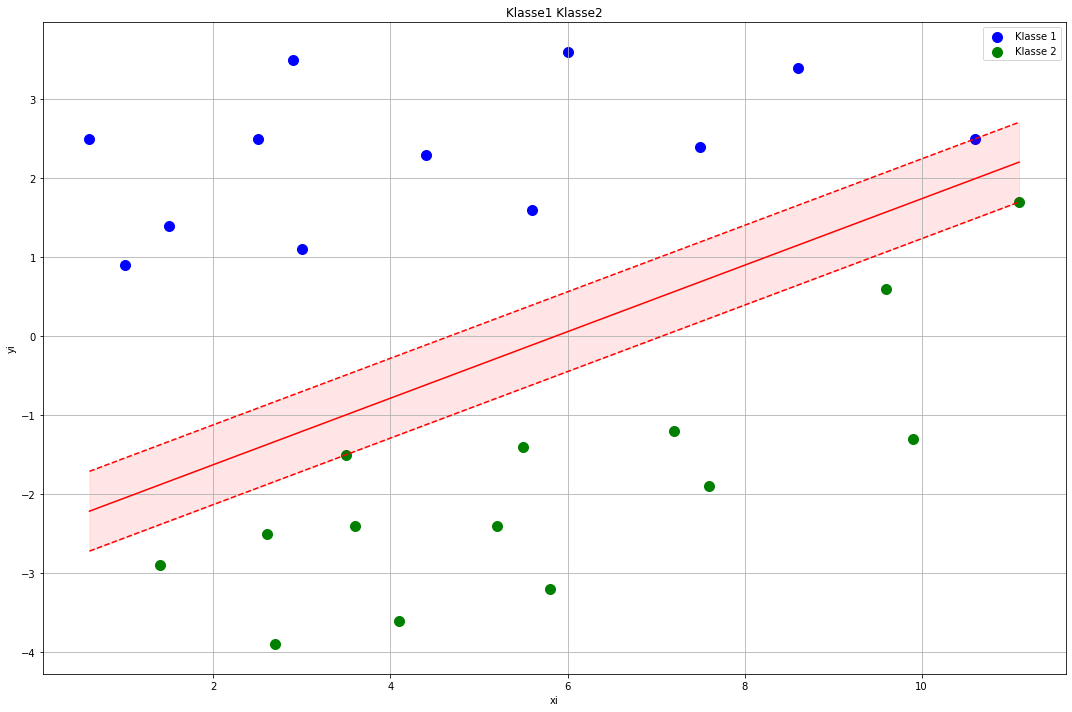

In [42]:
ax = klasse_1.plot.scatter(x="xi", y="yi",s=100, color="b", label="Klasse 1",title='Klasse1 Klasse2', figsize=(15,10))
klasse_2.plot.scatter(x="xi", y="yi",s=100, color="green", label="Klasse 2", ax=ax)

ax.plot(x,fun(x), 'r')
ax.plot(x,fun(x)+delta, 'r--')
ax.plot(x,fun(x)-delta, 'r--')
plt.fill_between(x,fun(x)+delta,fun(x)-delta ,color='r',alpha=0.1,label = 'Hyperebene')
plt.tight_layout()
plt.grid()
plt.show()

### (b) Wir erweitern die Datenmenge von (a) um die folgenden Daten:

In [43]:
xe = np.array([1.4, 4.0, 4.9, 7.2, 8.6, 9.9])
ye = np.array([-1.4, 1.0, -1.0, 1.5, 0.5, 0.7] )
ke = np.array([2, 2, 1, 2, 1, 1])

erweiterung = pd.DataFrame({'xi':xe, 'yi':ye, 'Klasse': ke})
erweiterung.index = [None for i in range(0,6)]
erweiterung
klassen

,xi,yi,Klasse
0,0.6,2.5,1
1,8.6,3.4,1
2,7.5,2.4,1
3,6.0,3.6,1
4,5.6,1.6,1
5,10.6,2.5,1
6,3.0,1.1,1
7,4.4,2.3,1
8,1.0,0.9,1
9,2.5,2.5,1


In [44]:
klassen = klassen.append(erweiterung) # nur einmal ausführen !!!!
klassen = klassen.sort_values(by=['Klasse']).reset_index(drop=True)

klasse_1 = klassen[klassen['Klasse']==1]
klasse_2 = klassen[klassen['Klasse']==2]
klasse_1 = klasse_1.sort_values(by=['xi']).reset_index(drop=True)
klasse_2 = klasse_2.sort_values(by=['xi']).reset_index(drop=True)

In [45]:
x_k1 = np.array(klasse_1['xi'].values)
y_k1 = np.array(klasse_1['yi'].values)
x_k2 = np.array(klasse_2['xi'].values)
y_k2 = np.array(klasse_2['yi'].values)

## Lp erzeugen

In [46]:
def lp_hyperebene_ohne_delta(functions:[str]=['c','x'],a_x:[float]=None, a_y:[float]=None,b_x:[float]=None, 
                  b_y:[float]=None, delta=True, filename:str=None):
    
    n, m, l = len(functions), len(a_x), len(b_x)   # assume all input-array have the same length
    alpha = list(st.ascii_lowercase)[:n]
    s = 'minimize\n\t' + '#' + '\nsubject to\n'
    z, acl, bcl = '', '', ''
    
    for i in range(0,m):
        z += 'v'+ str(i) + ' + '
        acl += '\t a + {0} b + u{1} - v{2} = {3} \n'.format(a_x[i],i,i,a_y[i])
    z += '\n\t'
    for i in range(0,l):
        z += 'x'+ str(i) + ' + '
        bcl += '\t a + {0} b + x{1} - y{2} = {3} \n'.format(b_x[i],i,i,b_y[i])
    s = s.replace('#', z[:-2])
    s += acl +'\n'+ bcl
    s += 'bounds\n'
    for i in alpha: s+= '\t' + i + ' free\n'
    s += '\nend'
    
    print(s)
    return to_file(s,filename)            # return a file.lp with all functions


In [47]:
erweitert_lp = lp_hyperebene_ohne_delta(functions=['c', 'x'],a_x=x_k1, a_y=y_k1, b_x=x_k2, b_y=y_k2, filename='erweitert.lp')

minimize
	v0 + v1 + v2 + v3 + v4 + v5 + v6 + v7 + v8 + v9 + v10 + v11 + v12 + v13 + v14 + 
	x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16 
subject to
	 a + 0.6 b + u0 - v0 = 2.5 
	 a + 1.0 b + u1 - v1 = 0.9 
	 a + 1.5 b + u2 - v2 = 1.4 
	 a + 2.5 b + u3 - v3 = 2.5 
	 a + 2.9 b + u4 - v4 = 3.5 
	 a + 3.0 b + u5 - v5 = 1.1 
	 a + 4.4 b + u6 - v6 = 2.3 
	 a + 4.9 b + u7 - v7 = -1.0 
	 a + 5.6 b + u8 - v8 = 1.6 
	 a + 6.0 b + u9 - v9 = 3.6 
	 a + 7.5 b + u10 - v10 = 2.4 
	 a + 8.6 b + u11 - v11 = 0.5 
	 a + 8.6 b + u12 - v12 = 3.4 
	 a + 9.9 b + u13 - v13 = 0.7 
	 a + 10.6 b + u14 - v14 = 2.5 

	 a + 1.4 b + x0 - y0 = -1.4 
	 a + 1.4 b + x1 - y1 = -2.9 
	 a + 2.6 b + x2 - y2 = -2.5 
	 a + 2.7 b + x3 - y3 = -3.9 
	 a + 3.5 b + x4 - y4 = -1.5 
	 a + 3.6 b + x5 - y5 = -2.4 
	 a + 4.0 b + x6 - y6 = 1.0 
	 a + 4.1 b + x7 - y7 = -3.6 
	 a + 5.2 b + x8 - y8 = -2.4 
	 a + 5.5 b + x9 - y9 = -1.4 
	 a + 5.8 b + x10 - y10 = -3.2 
	 a + 7.2 b + x11 - y11 = 1

## Model erzeugen

In [48]:
model_ohne_del = Model(name = 'lp ohne delta')
model_ohne_del = read(erweitert_lp)
model_ohne_del.Params.LogToConsole = 0
model_ohne_del.optimize()

Read LP format model from file erweitert.lp
Reading time = 0.00 seconds
: 32 rows, 66 columns, 128 nonzeros


In [49]:
print('non zero values: ')
for v in model_ohne_del.getVars():
    if(v.x != 0):print('%s: %g' %(v.varName,v.x))

non zero values: 
v7: 1.81236
v11: 0.229213
x6: 0.167416
x11: 0.739326
x16: 1.02697
a: 0.922472
b: -0.0224719
u0: 1.59101
u2: 0.511236
u3: 1.63371
u4: 2.6427
u5: 0.244944
u6: 1.4764
u8: 0.803371
u9: 2.81236
u10: 1.64607
u12: 2.67079
u14: 1.81573
y0: 2.29101
y1: 3.79101
y2: 3.36404
y3: 4.7618
y4: 2.34382
y5: 3.24157
y7: 4.43034
y8: 3.20562
y9: 2.19888
y10: 3.99213
y12: 1.96067
y13: 2.65169
y14: 0.106742
y15: 2


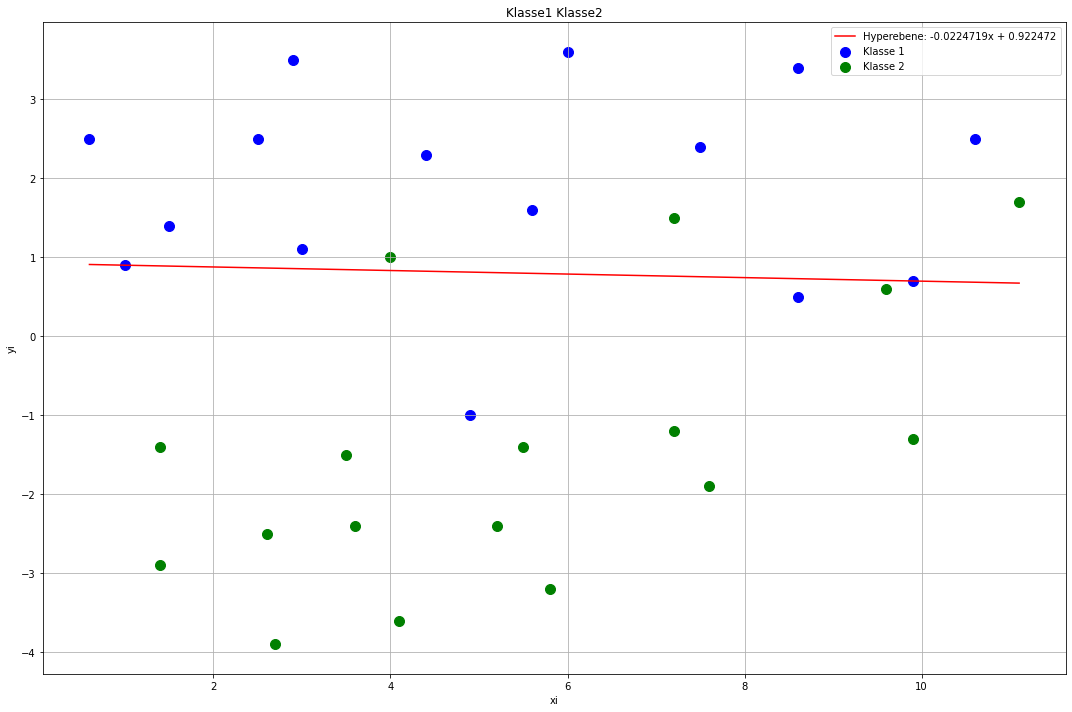

In [50]:
a =  0.922472
b = -0.0224719
x = np.linspace(klassen['xi'].values.min(),klassen['xi'].values.max())
fun = lambda x: a + b*x

ax = klasse_1.plot.scatter(x="xi", y="yi",s=100, color="b", label="Klasse 1",title='Klasse1 Klasse2', figsize=(15,10))
klasse_2.plot.scatter(x="xi", y="yi",s=100, color="green", label="Klasse 2", ax=ax)

ax.plot(x,fun(x), 'r',label='Hyperebene: {0}x + {1}'.format(b,a))

#plt.fill_between(x,fun(x)+delta,fun(x)-delta ,color='r',alpha=0.1,label = 'Hyperebene')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()